In [91]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sb
import matplotlib.pyplot as py
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/DigiKings/Downloads/RetailerData.csv")

In [3]:
data.nunique()
#data.tail() 
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,225/2022-23,141022260R,2,14-05-2022,1750.85,127415-0202,SO1
1,031/2022-23,111040150W,4,06-04-2022,1329.66,127415-0393,SO1
2,031/2022-23,151093081R,6,06-04-2022,1045.76,127415-0393,SO1
3,031/2022-23,141021565R,2,06-04-2022,1712.71,127415-0393,SO1
4,196/2022-23,111040150W,4,11-05-2022,1394.92,127415-0393,SO1


   month_year       revenue
0  2022-04-01  8.235237e+08
1  2022-05-01  5.484532e+08
2  2022-06-01  5.920736e+08
3  2022-07-01  4.993580e+08
4  2022-08-01  3.630327e+08
5  2022-09-01  3.941879e+08
6  2022-10-01  5.977866e+08
7  2022-11-01  9.124029e+08
8  2022-12-01  1.549163e+09
9  2023-01-01  4.755003e+08
10 2023-02-01  6.457929e+08
11 2023-03-01  1.402239e+09
12 2023-04-01  8.025353e+08
13 2023-05-01  1.322965e+07


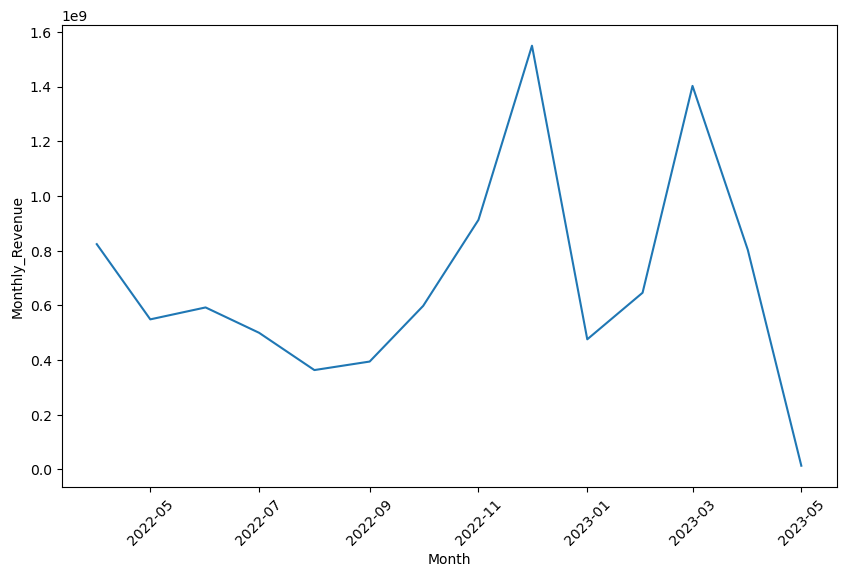

In [4]:
#monthly revenue (changing to date time and diffrenciating)
#data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
InvoiceDate = data['InvoiceDate'].astype(str)
data[['date','month', 'year']] = data['InvoiceDate'].str.split('-', expand=True)
data['month_year'] = pd.to_datetime(data['month'] + ' ' + data['year'] )

data['revenue'] = data['Quantity'] * data['UnitPrice']
data.sort_values(by=['InvoiceNo'])
sales_by_month = data.groupby(['month_year']).sum()['revenue'].reset_index()
fig,ax = py.subplots(figsize=(10, 6))
py.xlabel('Month')
py.ylabel('Monthly_Revenue')
py.xticks(rotation=45)
sb.lineplot(x="month_year", y="revenue", data=sales_by_month)
fig.show()
print(sales_by_month)

In [5]:
#total revenue in 1 year
total_revenue=data['revenue'].sum()
print(total_revenue)

9619278234.302748


In [6]:
#sb.distplot(data['MONTH'])

   month_year  revenue_growth_rate
0  2022-04-01                60743
1  2022-05-01                44682
2  2022-06-01                44591
3  2022-07-01                42940
4  2022-08-01                32993
5  2022-09-01                32634
6  2022-10-01                28077
7  2022-11-01                28153
8  2022-12-01                34754
9  2023-01-01                25897
10 2023-02-01                33910
11 2023-03-01                51784
12 2023-04-01                45020
13 2023-05-01                 1230


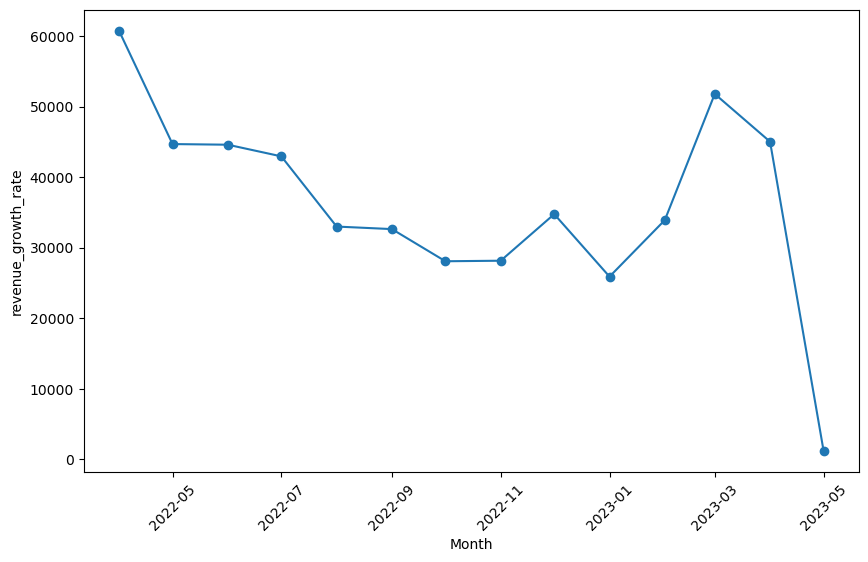

In [7]:
data.sort_values(by='month_year', inplace=True)
data['revenue_growth_rate'] = (data['revenue'].pct_change() * 100)
revenue_growth_monthly=data.groupby('month_year')['revenue_growth_rate'].nunique().reset_index()
fig,ax = py.subplots(figsize=(10, 6))
data.dropna()
py.xlabel('Month')
py.ylabel('revenue_growth_rate')
py.xticks(rotation=45)
py.plot(revenue_growth_monthly['month_year'],revenue_growth_monthly['revenue_growth_rate'], marker='o')
fig.show
print(revenue_growth_monthly)

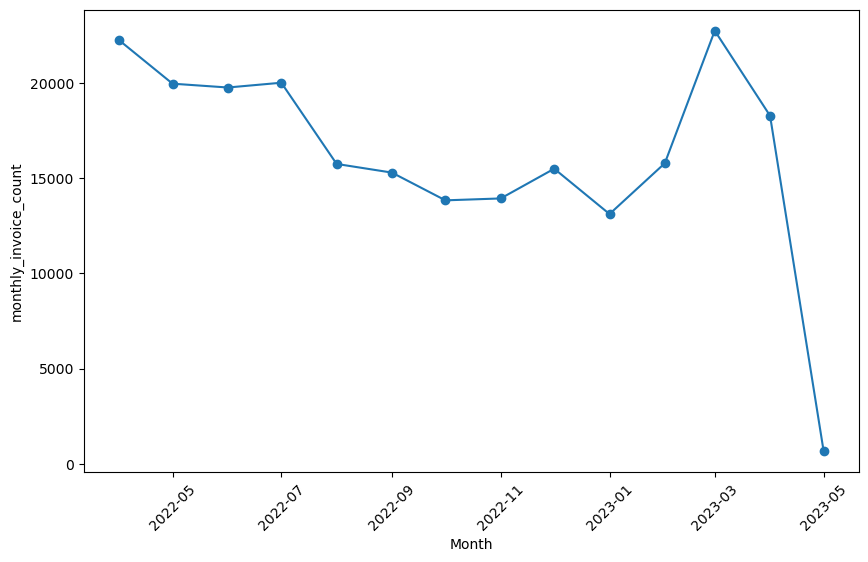

In [8]:
#monthly_invoice_count
monthly_invoice = data.groupby('month_year')['InvoiceNo'].nunique().reset_index()
fig,ax = py.subplots(figsize=(10, 6))
py.xlabel('Month')
py.ylabel('monthly_invoice_count')
py.xticks(rotation=45)
py.plot(monthly_invoice['month_year'], monthly_invoice['InvoiceNo'], marker='o')
fig.show()

In [9]:
monthly_active= data.groupby(['month_year'])['CustomerID'].size().reset_index(name='count')

In [10]:
print(monthly_active)

   month_year  count
0  2022-04-01  67450
1  2022-05-01  49196
2  2022-06-01  48910
3  2022-07-01  50323
4  2022-08-01  36988
5  2022-09-01  36684
6  2022-10-01  30609
7  2022-11-01  30659
8  2022-12-01  37925
9  2023-01-01  27773
10 2023-02-01  37624
11 2023-03-01  62367
12 2023-04-01  57072
13 2023-05-01   1290


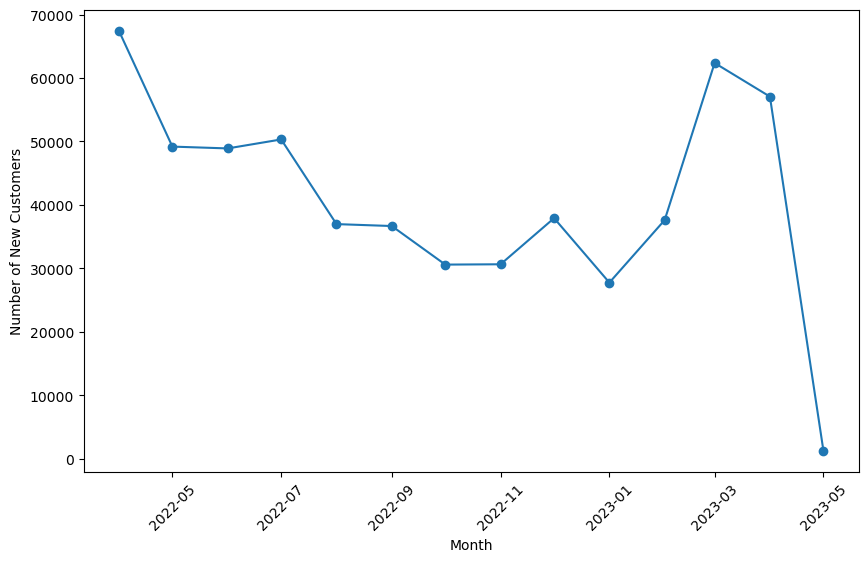

In [11]:
fig,ax = py.subplots(figsize=(10, 6))
py.xlabel('Month')
py.ylabel('Number of New Customers')
py.xticks(rotation=45)
py.plot(monthly_active['month_year'], monthly_active['count'], marker='o')
fig.show()

In [12]:
#average revenue per invoice
total_revenue=data['revenue'].sum()
length=len(data['InvoiceNo'])
average_revenue_per_invoice = total_revenue / length

In [13]:
print(total_revenue)
print(length)
print(average_revenue_per_invoice)

9619278234.302748
574870
16732.96264251526


In [14]:
# Identify the first purchase date for each customer
first_purchase = data.groupby('CustomerID')['month_year'].min()
# Create a set of customer IDs who have billed in any other month
duplicate_customers = set(data[data['CustomerID'].duplicated()]['CustomerID'])
new_customers = data.groupby('month_year')['CustomerID'].nunique().reset_index()
#total_customers= data.groupby(['month_year'])['CustomerID'].nunique().sum()
monthly_active= data.groupby(['month_year'])['CustomerID'].count()
new_customers_ratio = pd.merge(new_customers, monthly_active, on='month_year', suffixes=('_new', '_total'))
new_customers_ratio['NewCustomerRatio'] = (new_customers_ratio['CustomerID_new'] / new_customers_ratio['CustomerID_total']) * 100
#new_customers_ratio = (new_customers / total_customers) * 100

print(new_customers_ratio)

   month_year  CustomerID_new  CustomerID_total  NewCustomerRatio
0  2022-04-01           21532             67450         31.922906
1  2022-05-01           17919             49196         36.423693
2  2022-06-01           16798             48910         34.344715
3  2022-07-01           18360             50323         36.484311
4  2022-08-01           14078             36988         38.060993
5  2022-09-01           13339             36684         36.361902
6  2022-10-01           11910             30609         38.910124
7  2022-11-01           11569             30659         37.734434
8  2022-12-01           12016             37925         31.683586
9  2023-01-01           11205             27773         40.344939
10 2023-02-01           13382             37624         35.567723
11 2023-03-01           17232             62367         27.629997
12 2023-04-01           17954             57072         31.458509
13 2023-05-01             707              1290         54.806202


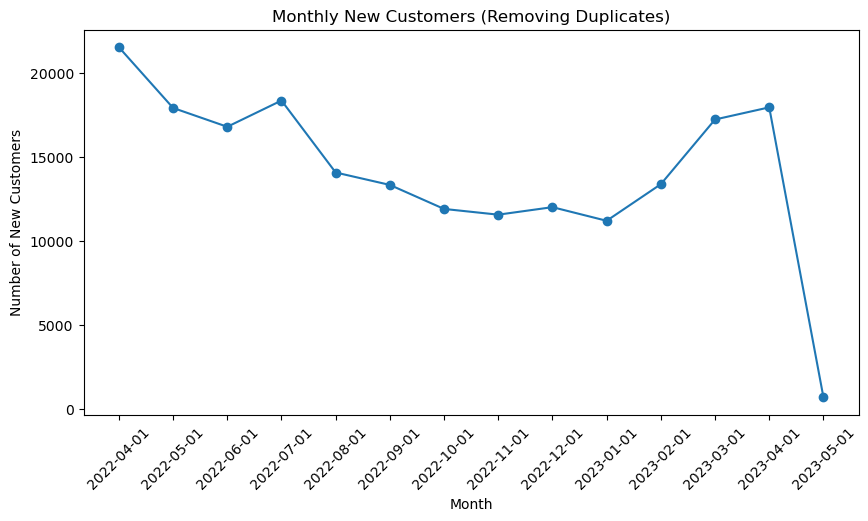

In [15]:
new_customers = data.groupby('month_year')['CustomerID'].nunique()
new_customers.index=new_customers.index.astype(str)
fig,ax = py.subplots(figsize=(10, 5))
py.xlabel('Month')
py.ylabel('Number of New Customers')
py.title('Monthly New Customers (Removing Duplicates)')
py.xticks(rotation=45)
py.plot(new_customers.index, new_customers.values,marker='o')
fig.show()

In [16]:
# Sort the data by month in ascending order
customer_data = data.sort_values('month_year')

# Calculate the number of unique customers for each month
unique_customers_per_month = data.groupby('month_year')['CustomerID'].nunique()

# Calculate the number of retained customers from the previous month
retained_customers = unique_customers_per_month.diff()

# Calculate the total number of active customers
total_customers = unique_customers_per_month.iloc[0]  # Assumes the first month has all the active customers

# Calculate the Monthly Retention Rate
monthly_retention_rate = (retained_customers / total_customers) * 100

# Display the Monthly Retention Rate
print(monthly_retention_rate)

month_year
2022-04-01          NaN
2022-05-01   -16.779677
2022-06-01    -5.206205
2022-07-01     7.254319
2022-08-01   -19.886680
2022-09-01    -3.432101
2022-10-01    -6.636634
2022-11-01    -1.583689
2022-12-01     2.075980
2023-01-01    -3.766487
2023-02-01    10.110533
2023-03-01    17.880364
2023-04-01     3.353149
2023-05-01   -80.099387
Name: CustomerID, dtype: float64


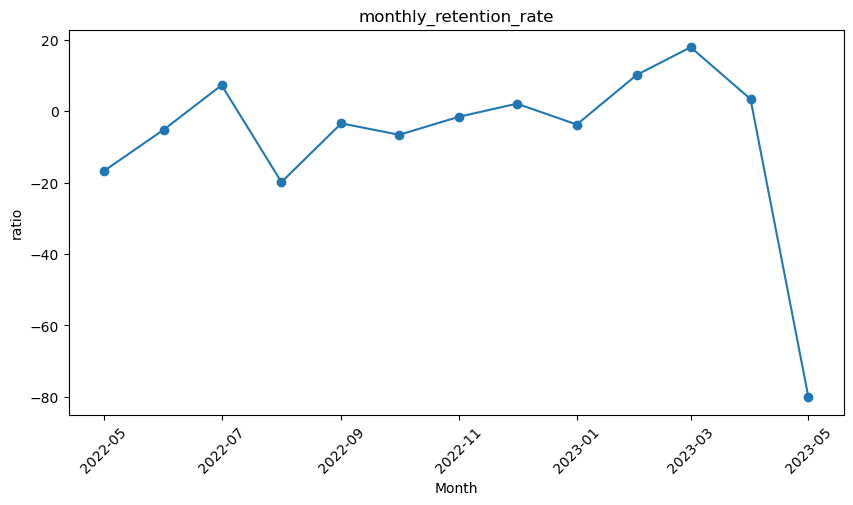

In [17]:
fig,ax = py.subplots(figsize=(10, 5))
py.xlabel('Month')
py.ylabel('ratio')
py.title('monthly_retention_rate')
py.xticks(rotation=45)
py.plot(monthly_retention_rate,marker='o')
fig.show()

# RFM ANALYSIS

In [92]:
present=pd.to_datetime(['2023-06-01'])

rfm = data.groupby('CustomerID').agg({'month_year': lambda date: (present - date.max()).days,
    'InvoiceNo': lambda num: num.count(),
    'revenue': lambda price: price.sum()})
#rfm.columns
#Change the name of columns
rfm.columns=['recency','frequency','monetary']
rfm = rfm[rfm["monetary"] > 0]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
100315-0807,92,3,72813.520000
100315-0887,61,2,13347.430000
100315-0901,304,2,39926.119998
100315-10366,426,1,2415.250000
100315-10367,304,1,4881.360000


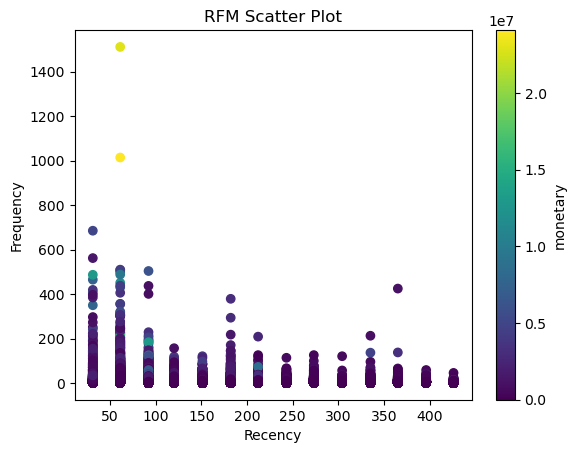

In [93]:
py.scatter(rfm['recency'], rfm['frequency'], c=rfm['monetary'], cmap='viridis')
py.xlabel('Recency')
py.ylabel('Frequency')
py.title('RFM Scatter Plot')
py.colorbar(label='monetary')
py.show()

In [94]:
X=rfm['recency'].values
x= X.reshape(-1, 1)
#within cluster sum of square
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

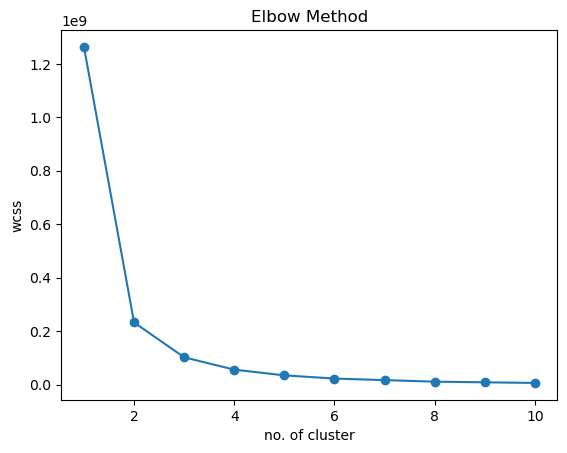

In [95]:
py.plot(range(1,11),wcss,marker='o')
py.title('Elbow Method')
py.xlabel('no. of cluster')
y_kmeans=kmeans.fit_predict(x)
py.ylabel('wcss')
py.show()

In [96]:
Y=rfm['frequency'].values
y = Y.reshape(-1, 1)
#within cluster sum of square
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
    

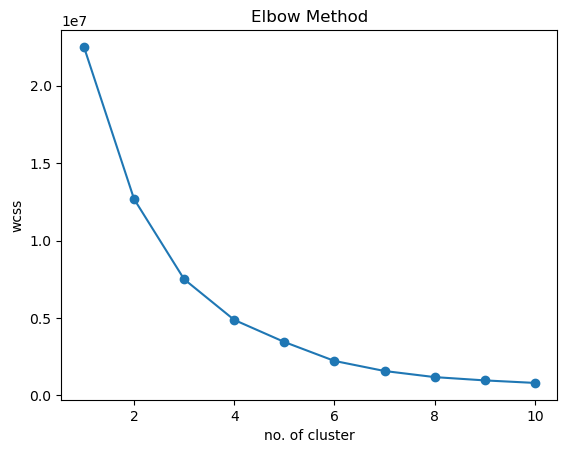

In [97]:
py.plot(range(1,11),wcss,marker='o')
py.title('Elbow Method')
py.xlabel('no. of cluster')
y_kmeans=kmeans.fit_predict(y)
py.ylabel('wcss')
py.show()

In [98]:
Z=rfm['monetary'].values
z= Z.reshape(-1, 1)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)
    

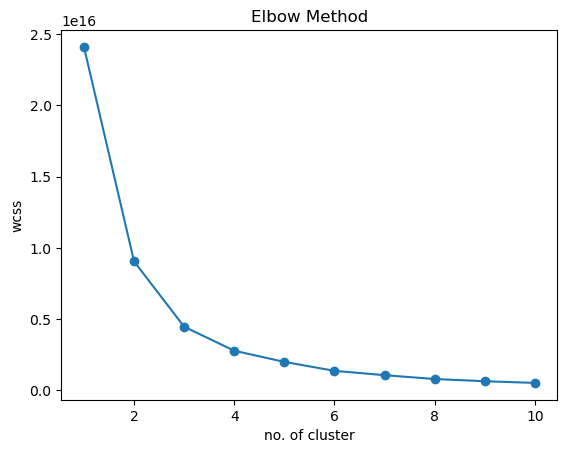

In [99]:
py.plot(range(1,11),wcss,marker='o')
py.title('Elbow Method')
py.xlabel('no. of cluster')
y_kmeans=kmeans.fit_predict(z)
py.ylabel('wcss')
py.show()

In [100]:
W=rfm.iloc[:,[0]].values
#within cluster sum of square
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(W)
    wcss.append(kmeans.inertia_)
    

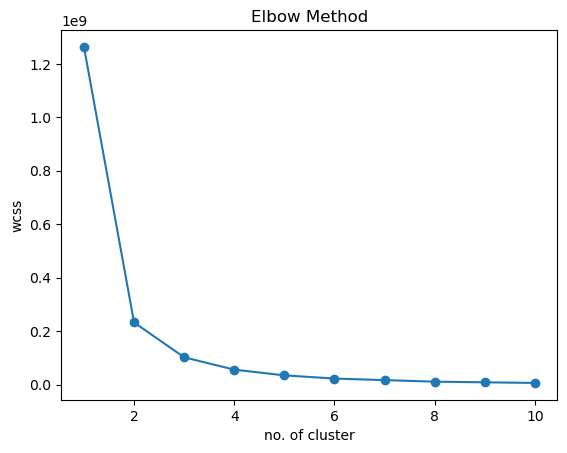

In [101]:
py.plot(range(1,11),wcss,marker='o')
py.title('Elbow Method')
py.xlabel('no. of cluster')
y_kmeans=kmeans.fit_predict(W)
py.ylabel('wcss')
py.show()

In [102]:
 #computing the Quantile of RFM value for segmentation
rfm['recency_score'] = pd.qcut(rfm['recency'], 3, ['2','1','0'])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method="first"),3, ['0','1','2'])
rfm['monetary_score'] = pd.qcut(rfm['monetary'],3, ['0','1','2'])

rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score
CustomerID,,,,,,,
100315-0807,92,3,72813.520000,2,1,2,5
100315-0887,61,2,13347.430000,2,0,1,3
100315-0901,304,2,39926.119998,0,0,1,1
100315-10366,426,1,2415.250000,0,0,0,0
100315-10367,304,1,4881.360000,0,0,0,0


In [103]:
rfm[rfm['score']== 6].sort_values('monetary', ascending=False).head()
rfm[rfm['score']==6].count()

recency            12253
frequency          12253
monetary           12253
recency_score      12253
frequency_score    12253
monetary_score     12253
score              12253
dtype: int64

low_value          34001
high_value         22235
at_risk            14459
loyal_customers     8054
Name: level, dtype: int64


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level
CustomerID,,,,,,,,
100315-0807,92,3,72813.520000,2,1,2,5,high_value
100315-0887,61,2,13347.430000,2,0,1,3,loyal_customers
100315-0901,304,2,39926.119998,0,0,1,1,low_value
100315-10366,426,1,2415.250000,0,0,0,0,low_value
100315-10367,304,1,4881.360000,0,0,0,0,low_value


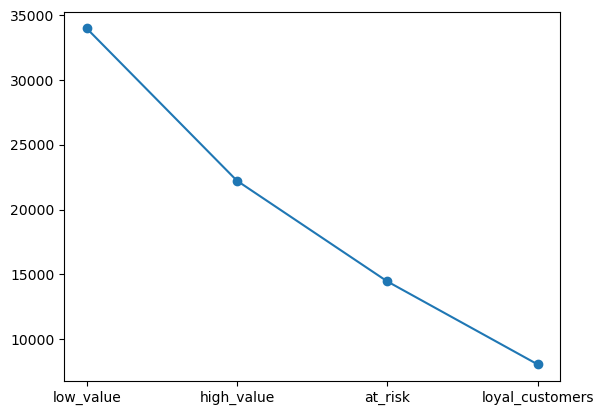

In [126]:
def rfm_level (score,recency_score):
    if score < 3:
        return 'low_value'
    elif (score > 2 and score < 5) and (recency_score == 0 or recency_score == 1):
        return 'at_risk'
    elif (score > 2 and score < 5) and (recency_score == 2):
        return 'loyal_customers'
    else:
        return 'high_value'

rfm['level'] = rfm.apply(lambda row: rfm_level(row['score'], row['recency_score']), axis=1)
level_count = rfm['level'].value_counts()
print(level_count)
level_count = level_count.astype(int)
py.plot(level_count, marker='o')

rfm.head()

In [127]:
def level_category(level):
    if level=='low_value' :
        return '1'
    elif level=='at_risk' :
        return '2'
    elif level=='loyal_customers' :
        return '3'
    else :
        return '4'
    
rfm['level_category'] = rfm['level'].apply(lambda level : level_category(level))

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level,level_category
CustomerID,,,,,,,,,
100315-0807,92,3,72813.520000,2,1,2,5,high_value,4
100315-0887,61,2,13347.430000,2,0,1,3,loyal_customers,3
100315-0901,304,2,39926.119998,0,0,1,1,low_value,1
100315-10366,426,1,2415.250000,0,0,0,0,low_value,1
100315-10367,304,1,4881.360000,0,0,0,0,low_value,1


# analysing each level

In [128]:
rfm.groupby('level').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency            frequency                 monetary  \
                       mean  min  max       mean min   max           mean   
level                                                                       
at_risk          241.478871  120  426   5.629435   1   425   79853.476823   
high_value        98.526242   31  273  18.488284   2  1511  355725.742109   
low_value        280.589689   31  426   1.685862   1     9   11253.761522   
loyal_customers   72.626521   31   92   2.977899   1    12   21827.223835   

                                                  
                          min         max  count  
level                                             
at_risk          9.094947e-13   7507632.0  14459  
high_value       1.089553e+04  24104213.4  22235  
low_value        9.094947e-13   4449144.0  34001  
loyal_customers  2.000000e+00   1736500.0   8054

In [129]:
#from the above data in active customers ,38852 customers buys 232761 quantity   approximately 12 times in 133 days , best customers
#also the customers that are gone only buys 3369 quantity in 369 days , so they are long gone 

In [130]:


#comparing rfm 

cross_table1=pd.crosstab(index=rfm['monetary_score'],columns=rfm['frequency_score'])
cross_table2=pd.crosstab(index=rfm['monetary_score'],columns=rfm['recency_score'])
cross_table3=pd.crosstab(index=rfm['frequency_score'],columns=rfm['recency_score'])


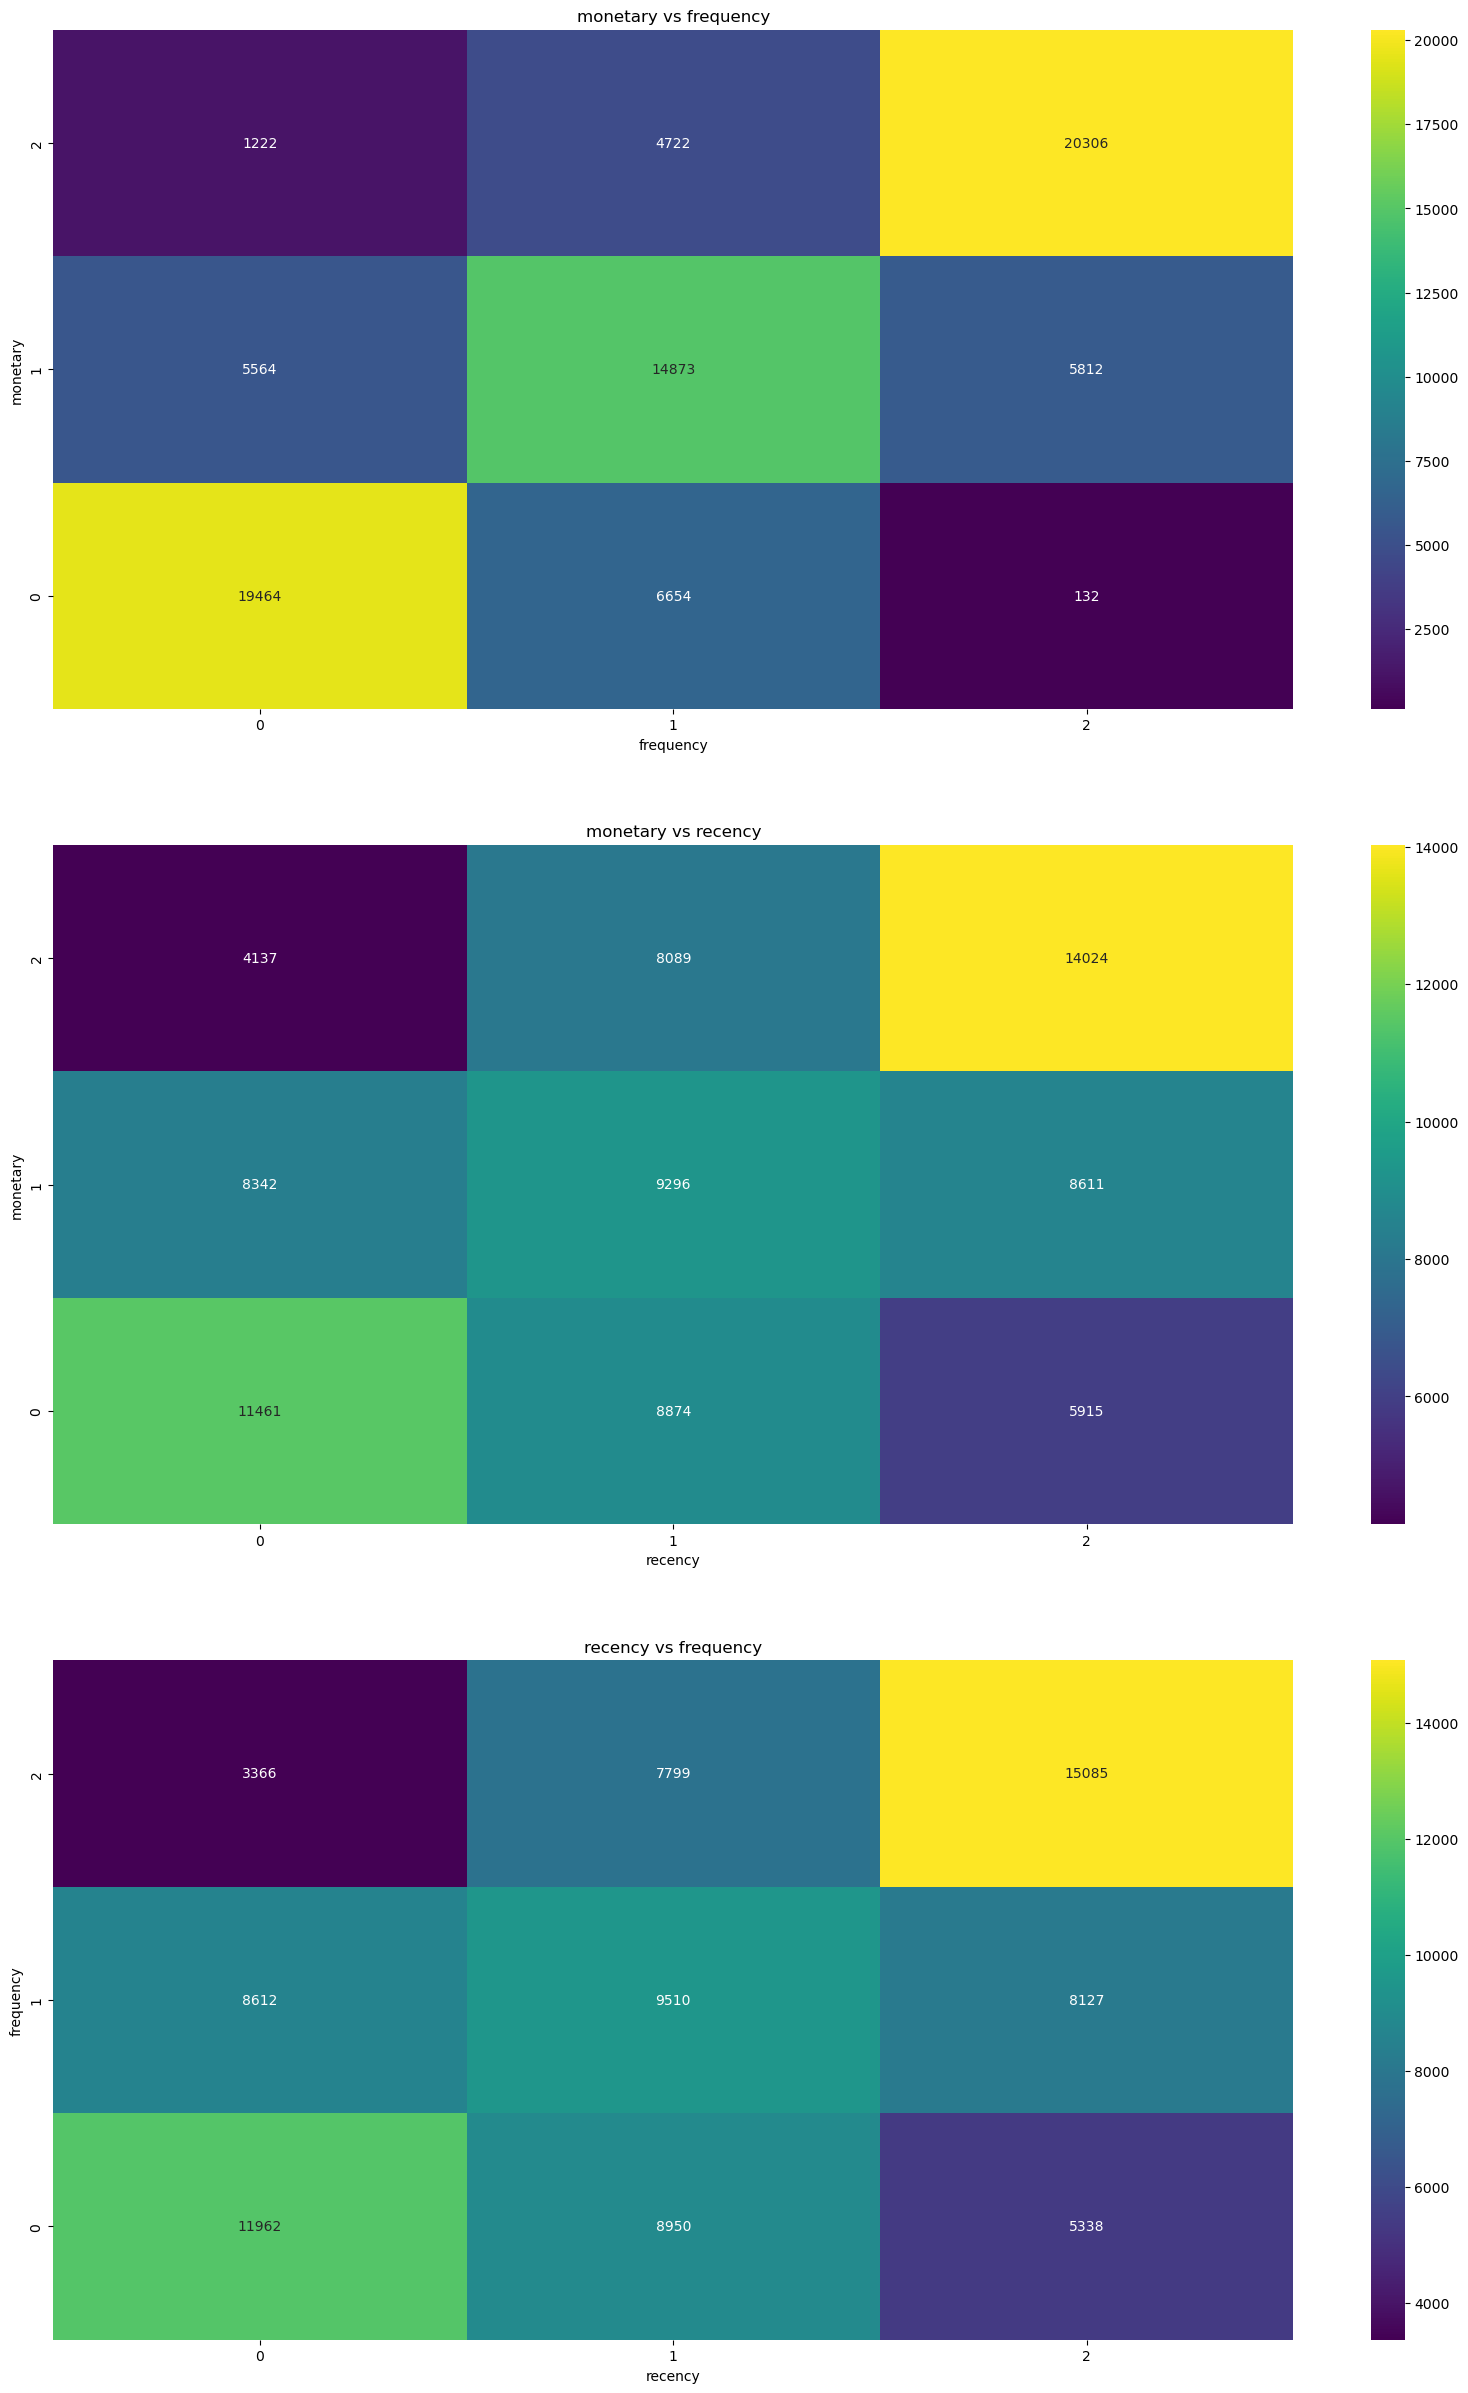

In [131]:
py.figure(figsize=(20,30))
py.subplot(311)
ax1 = sb.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('monetary')
ax1.set_xlabel('frequency')
ax1.set_title('monetary vs frequency')
py.subplot(312)
ax2 = sb.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('monetary')
ax2.set_xlabel('recency')
ax2.set_title('monetary vs recency')
py.subplot(313)
ax3 = sb.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('frequency')
ax3.set_xlabel('recency')
ax3.set_title('recency vs frequency')
py.show()

In [132]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,score,level,level_category
CustomerID,,,,,,,,,
100315-0807,92,3,72813.520000,2,1,2,5,high_value,4
100315-0887,61,2,13347.430000,2,0,1,3,loyal_customers,3
100315-0901,304,2,39926.119998,0,0,1,1,low_value,1
100315-10366,426,1,2415.250000,0,0,0,0,low_value,1
100315-10367,304,1,4881.360000,0,0,0,0,low_value,1


In [133]:
rfm['total_sales']=rfm['frequency']*rfm['monetary']

In [134]:
columns_to_drop=['recency','frequency','monetary']
rfm_final=rfm.drop(columns_to_drop,axis=1)
rfm_final.head()

,recency_score,frequency_score,monetary_score,score,level,level_category,total_sales
CustomerID,,,,,,,
100315-0807,2,1,2,5,high_value,4,218440.560000
100315-0887,2,0,1,3,loyal_customers,3,26694.860000
100315-0901,0,0,1,1,low_value,1,79852.239996
100315-10366,0,0,0,0,low_value,1,2415.250000
100315-10367,0,0,0,0,low_value,1,4881.360000


In [136]:
rfm_final = pd.DataFrame(rfm_final)
file_path = 'C:/Users/DigiKings/Desktop/rfm/rfmmm.csv'
rfm_final.to_csv(file_path)

In [ ]:
data=pd.DataFrame(data)
file_path = 'C:/Users/DigiKings/Desktop/rfm/data.csv'
data.to_csv(file_path)

# customer lifetime prediction

In [97]:
#CLTv=Total gross revenue * total cost

In [204]:
#CLTV Prediction = (Total Gross Revenue - Total Cost) * Average Customer Lifespan
#data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
#acl=data(['InvoiceDate'].max)
#-['InvoiceDate'].min)
#acl=data.groupby()['CustomerID'].


In [67]:
!pip install xgboost


In [68]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
rfm.nunique()

recency               14
frequency            252
monetary           58748
recency_score          3
frequency_score        3
monetary_score         3
score                  7
level                  3
level_category         3
total_sales        60779
dtype: int64

In [70]:
print(data.dtypes)

InvoiceNo                      object
StockCode                      object
Quantity                        int64
InvoiceDate                    object
UnitPrice                     float64
CustomerID                     object
Country                        object
date                           object
month                          object
year                           object
month_year             datetime64[ns]
revenue                       float64
revenue_growth_rate           float64
dtype: object


In [530]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#data['StockCode'] = le.fit_transform(data['StockCode'])
data['Customerid'] = le.fit_transform(data['CustomerID'])
data['InvoiceNo'] = le.fit_transform(data['InvoiceNo'])
#data['StockCode']=data['StockCode'].astype(int)
data['InvoiceNo']=data['InvoiceNo'].astype(int)
data['Customerid']=data['Customerid'].astype(int)
#data['CustomerID'] =data['CustomerID'].replace('-','')
#data['CustomerID'] =data['CustomerID'].astype(int)

In [73]:

#data['date'] = data['date'].astype(int)
#data['month'] = data['month'].astype(int)
#data['year'] = data['year'].astype(int)
print(data.dtypes)
clv = data[[ 'CustomerID', 'Quantity', 'UnitPrice' ,'revenue' ,'InvoiceNo' ]]

InvoiceNo                      object
StockCode                      object
Quantity                        int64
InvoiceDate                    object
UnitPrice                     float64
CustomerID                     object
Country                        object
date                           object
month                          object
year                           object
month_year             datetime64[ns]
revenue                       float64
revenue_growth_rate           float64
dtype: object


In [74]:
X = clv.drop('revenue', axis=1)  # Replace 'target_variable' with the actual column name
y = data['revenue']
clv.head()
#clv.dropna()
#rfm.head()

,CustomerID,Quantity,UnitPrice,revenue,InvoiceNo
110285,136175-2912,2,2025.00,4050.00,MKJE/054/2019-20
240310,110234-0420,4,2220.34,8881.36,PS/GST22-23/0271
240309,110234-0420,4,1677.97,6711.88,PS/GST22-23/0271
53425,126925-4305,40,1050.00,42000.00,JHA/TI/010/22-23
53422,125211-1530,2,1200.00,2400.00,1


In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [534]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (344922, 4) (344922,)
Testing set shape: (229948, 4) (229948,)


In [535]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

In [536]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [537]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [538]:
y_pred = xgb_model.predict(X_test)

In [539]:
#y_pred.max()
#y_test.max()

In [540]:
xgb_model.score(X_train,y_train)*100

99.9855694982547

In [541]:
xgb_model.score(X_test,y_test)*100

99.22476978700004

In [542]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,month,year,month_year,revenue,revenue_growth_rate,Customerid
110285,96949,131023041RV,2,29-04-2022,2025.00,33352,SO3,29,04,2022,2022-04-01,4050.00,NaN,33352
240310,106227,11105BYSBGBW,4,30-04-2022,2220.34,5866,SO15,30,04,2022,2022-04-01,8881.36,119.292840,5866
240309,106227,11114SO10W,4,30-04-2022,1677.97,5866,SO15,30,04,2022,2022-04-01,6711.88,-24.427340,5866
53425,83632,111148510W,40,16-04-2022,1050.00,23426,SO13,16,04,2022,2022-04-01,42000.00,525.756122,23426
53422,4822,151012661,2,20-04-2022,1200.00,21441,SO13,20,04,2022,2022-04-01,2400.00,-94.285714,21441


In [543]:
clv.columns

Index(['Customerid', 'Quantity', 'UnitPrice', 'revenue', 'InvoiceNo'], dtype='object')

In [544]:

#data=data.drop(['ID','revenue_growth_rate','acl','encoded_column'],axis=1)

In [549]:
 df={'Customerid':21441 ,'Quantity':2, 'UnitPrice':1200.00 , 'InvoiceNo':4822}
index=[53422]
df=pd.DataFrame(df,index)
df

,Customerid,Quantity,UnitPrice,InvoiceNo
53422,21441,2,1200.0,4822


In [550]:
new_pred= xgb_model.predict(df)

In [551]:
print(new_pred)

[2439.95]


In [498]:
#x_ax=range(len(y_test))
#py.plot(x_ax,y_test,label='original')
#py.plot(x_ax,y_pred,label='predicted')
#py.legend()
#py.show()